<a href="https://colab.research.google.com/github/adsamardeep/Google-Play-Store/blob/master/GooglePlaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt

In [0]:
#1.	Load the data file using pandas.

In [0]:
data = pd.read_csv("/content/googleplaystore.csv")

In [0]:
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [0]:
#2.	Check for null values in the data. Get the number of null values for each column.

In [0]:
data.isna().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [0]:
#3.	Drop records with nulls in any of the columns. 

In [0]:
data1 = data.dropna()

In [0]:
data1.isna().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [0]:
#4.	Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
#4.1.	Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
#4.1.2.	Multiply the value by 1,000, if size is mentioned in Mb

In [0]:
data1['Size'] = data1['Size'].str.replace('M', '000', regex = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data1['Size'] = data1['Size'].str.replace('.', '', regex = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data1['Size'] = data1['Size'].str.replace('k', '', regex = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data1['Size']

0                     19000
1                     14000
2                     87000
3                     25000
4                     28000
                ...        
10834                 26000
10836                 53000
10837                 36000
10839    Varies with device
10840                 19000
Name: Size, Length: 9360, dtype: object

In [0]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [0]:
#4.1.1.	Extract the numeric value from the column

In [0]:
data1.isna().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [0]:
data1['Size'] = data1['Size'][data1['Size'].str.isdigit() == True].copy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data2 = data1.dropna()

In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null object
Size              7723 non-null object
Installs          7723 non-null object
Type              7723 non-null object
Price             7723 non-null object
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(1), object(12)
memory usage: 844.7+ KB


In [0]:
data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,26000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [0]:
#4.2.	Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null object
Size              7723 non-null object
Installs          7723 non-null object
Type              7723 non-null object
Price             7723 non-null object
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(1), object(12)
memory usage: 844.7+ KB


In [0]:
data2['Reviews'] = data2['Reviews'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null int64
Size              7723 non-null object
Installs          7723 non-null object
Type              7723 non-null object
Price             7723 non-null object
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 844.7+ KB


In [0]:
#4.3.	Installs field is currently stored as string and has values like 1,000,000+. 
#4.3.1.	Treat 1,000,000+ as 1,000,000
#4.3.2.	remove ‘+’, ‘,’ from the field, convert it to integer

In [0]:
data2['Installs'] = data2['Installs'].str.replace('+', '', regex = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data2['Installs'] = data2['Installs'].str.replace(',', '', regex = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,26000,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [0]:
data2['Installs'] = data2['Installs'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null int64
Size              7723 non-null object
Installs          7723 non-null int64
Type              7723 non-null object
Price             7723 non-null object
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 844.7+ KB


In [0]:
#4.4.	Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [0]:
data2['Price'] = data2['Price'].str.replace('$', '', regex = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data2['Price'] = data2['Price'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null int64
Size              7723 non-null object
Installs          7723 non-null int64
Type              7723 non-null object
Price             7723 non-null float64
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 844.7+ KB


In [0]:
#5. Sanity checks:
#5.1.	Average rating should be between 1 and 5 as only these values are allowed on the play store.
# Drop the rows that have a value outside this range.


In [0]:
#s2[s2.str.isdigit() == True].copy()
#s2.loc[s2.str.isdigit()]
#data2.loc[(data2.Rating < 5.0)]
#data2.loc[(data2.Rating > 1.0)]
#data2.loc[(1< data2.Rating)]
data2 = data2.loc[data2.Rating.between(1.0 , 5.0)]
#data2['Rating'] = data2.loc[(data2['Rating'] >= 1.0) & (data2['Rating'] <= 5.0)]

In [0]:
data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,26000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,36000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [0]:
#5.2.	Reviews should not be more than installs as only those who installed can review the app. 
#If there are any such records, drop them.

In [0]:
data2['R<=I'] = (data2['Reviews'] <= data2['Installs'])

In [0]:
data3 = data2.loc[data2['R<=I']]

In [0]:
data3 = data3.drop(columns = 'R<=I')

In [0]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 13 columns):
App               7717 non-null object
Category          7717 non-null object
Rating            7717 non-null float64
Reviews           7717 non-null int64
Size              7717 non-null object
Installs          7717 non-null int64
Type              7717 non-null object
Price             7717 non-null float64
Content Rating    7717 non-null object
Genres            7717 non-null object
Last Updated      7717 non-null object
Current Ver       7717 non-null object
Android Ver       7717 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 844.0+ KB


In [0]:
#5.3.	For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [0]:
data4 = data3.loc[(data3['Price'] <= 0) & data3['Type'].isin(['Free']) | (data3['Price'] >= 0) & data3['Type'].isin(['Paid'])]

In [0]:
data4['Rating'] = data4['Rating'].astype(float)

In [0]:
data4['Size'] = data4['Size'].astype(int)

In [0]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 10840
Data columns (total 13 columns):
App               7717 non-null object
Category          7717 non-null object
Rating            7717 non-null float64
Reviews           7717 non-null int64
Size              7717 non-null int64
Installs          7717 non-null int64
Type              7717 non-null object
Price             7717 non-null float64
Content Rating    7717 non-null object
Genres            7717 non-null object
Last Updated      7717 non-null object
Current Ver       7717 non-null object
Android Ver       7717 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 844.0+ KB


In [0]:
data4.describe()

,Rating,Reviews,Installs,Price
count,7717.000000,7.717000e+03,7.717000e+03,7717.000000
mean,4.173293,2.951275e+05,8.430620e+06,1.128725
std,0.544362,1.864640e+06,5.017636e+07,17.414784
min,1.000000,1.000000e+00,5.000000e+00,0.000000
25%,4.000000,1.090000e+02,1.000000e+04,0.000000
50%,4.300000,2.351000e+03,1.000000e+05,0.000000
75%,4.500000,3.910900e+04,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+09,400.000000


In [0]:
data4.to_csv('file1.csv')

In [0]:
#6. Performing univariate analysis: 
#•	Boxplot for Price
#•	Are there any outliers? Think about the price of usual apps on Play Store.

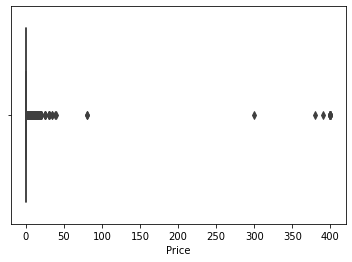

In [0]:
sns.boxplot(data4.Price)

In [0]:
#•	Boxplot for Reviews
#•	Are there any apps with very high number of reviews? Do the values seem right?

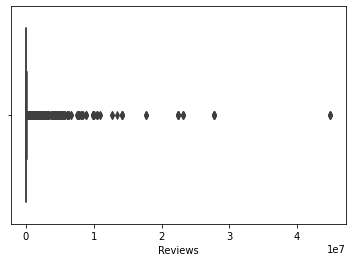

In [0]:
sns.boxplot(data4.Reviews)

In [0]:
#•	Histogram for Rating
#•	How are the ratings distributed? Is it more toward higher ratings?

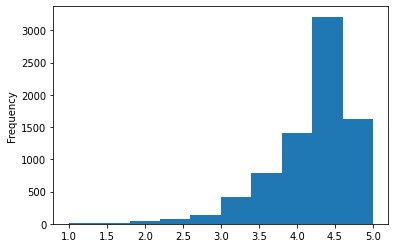

In [0]:
data4.Rating.plot.hist()

In [0]:
#•	Histogram for Size
#Note down your observations for the plots made above. Which of these seem to have outliers?

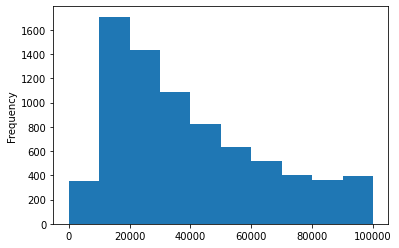

In [0]:
data4.Size.plot.hist()

In [0]:
#7. Outlier treatment: 
#1.	Price: From the box plot, it seems like there are some apps with very high price. 
#A price of $200 for an application on the Play Store is very high and suspicious!
#1.	Check out the records with very high price
#1.	Is 200 indeed a high price?

In [0]:
data4.Price.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10    0.00
0.25    0.00
0.50    0.00
0.70    0.00
0.90    0.00
0.95    1.99
0.99    9.99
Name: Price, dtype: float64

In [0]:
#2.	Drop these as most seem to be junk apps

In [0]:
data5 = data4[data4.Price < 200].copy()

In [0]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7702 entries, 0 to 10840
Data columns (total 13 columns):
App               7702 non-null object
Category          7702 non-null object
Rating            7702 non-null float64
Reviews           7702 non-null int64
Size              7702 non-null int64
Installs          7702 non-null int64
Type              7702 non-null object
Price             7702 non-null float64
Content Rating    7702 non-null object
Genres            7702 non-null object
Last Updated      7702 non-null object
Current Ver       7702 non-null object
Android Ver       7702 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 842.4+ KB


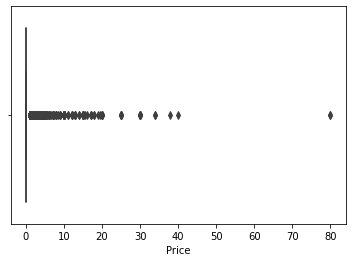

In [0]:
sns.boxplot(data5.Price)

In [0]:
#2.	Reviews: Very few apps have very high number of reviews. 
#These are all star apps that don’t help with the analysis and, in fact, will skew it. 
#Drop records having more than 2 million reviews.

In [0]:
data6 = data5[data5.Reviews < 2000000].copy()

In [0]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 10840
Data columns (total 13 columns):
App               7483 non-null object
Category          7483 non-null object
Rating            7483 non-null float64
Reviews           7483 non-null int64
Size              7483 non-null int64
Installs          7483 non-null int64
Type              7483 non-null object
Price             7483 non-null float64
Content Rating    7483 non-null object
Genres            7483 non-null object
Last Updated      7483 non-null object
Current Ver       7483 non-null object
Android Ver       7483 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 818.5+ KB


In [0]:
#3.	Installs:  There seems to be some outliers in this field too. 
#Apps having very high number of installs should be dropped from the analysis.
#1.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
#2.	Decide a threshold as cutoff for outlier and drop records having values more than that

In [0]:
data6.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [0]:
data7 = data6[data6.Installs < 10000000].copy()

In [0]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6489 entries, 0 to 10837
Data columns (total 13 columns):
App               6489 non-null object
Category          6489 non-null object
Rating            6489 non-null float64
Reviews           6489 non-null int64
Size              6489 non-null int64
Installs          6489 non-null int64
Type              6489 non-null object
Price             6489 non-null float64
Content Rating    6489 non-null object
Genres            6489 non-null object
Last Updated      6489 non-null object
Current Ver       6489 non-null object
Android Ver       6489 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 709.7+ KB


In [0]:
#8. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, 
#i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features)
#to assess the relations between rating and the other features.
#1.	Make scatter plot/joinplot for Rating vs. Price
#1.	What pattern do you observe? Does rating increase with price?

<Figure size 1440x864 with 0 Axes>

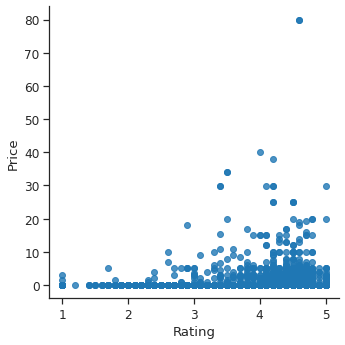

In [0]:
plt.figure(figsize=[20,12])
sns.lmplot('Rating','Price',data=data7,fit_reg=False)

In [0]:
#2.	Make scatter plot/joinplot for Rating vs. Size
#1.	Are heavier apps rated better?

<Figure size 1440x864 with 0 Axes>

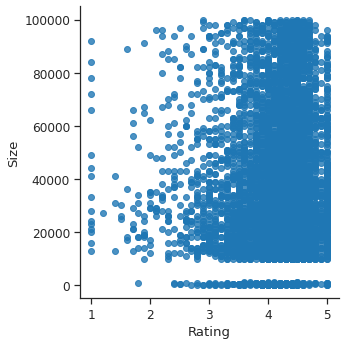

In [0]:
plt.figure(figsize=[20,12])
sns.lmplot('Rating','Size',data=data7,fit_reg=False)

In [0]:
#3.	Make scatter plot/joinplot for Rating vs. Reviews
#1.	Does more review mean a better rating always?

<Figure size 1440x864 with 0 Axes>

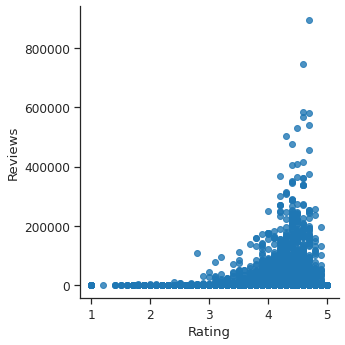

In [0]:
plt.figure(figsize=[20,12])
sns.lmplot('Rating','Reviews',data=data7,fit_reg=False)

In [0]:
#4.	Make boxplot for Rating vs. Content Rating
#1.	Is there any difference in the ratings? Are some types liked better?

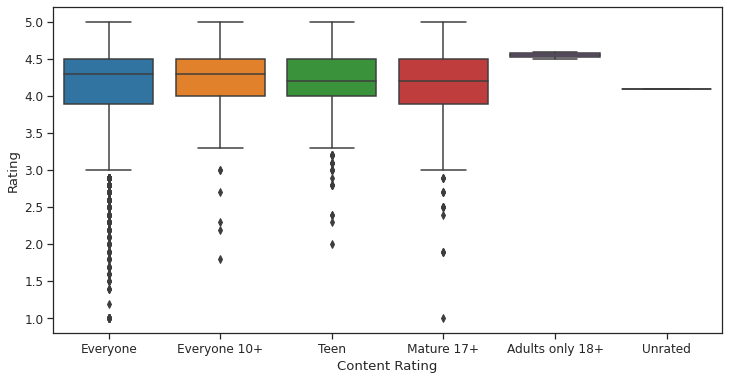

In [0]:
plt.figure(figsize=[12,6])
sns.boxplot("Content Rating", "Rating", data=data7)

In [0]:
#5.	Make boxplot for Ratings vs. Category
#1.	Which genre has the best ratings?
#For each of the plots above, note down your observation.

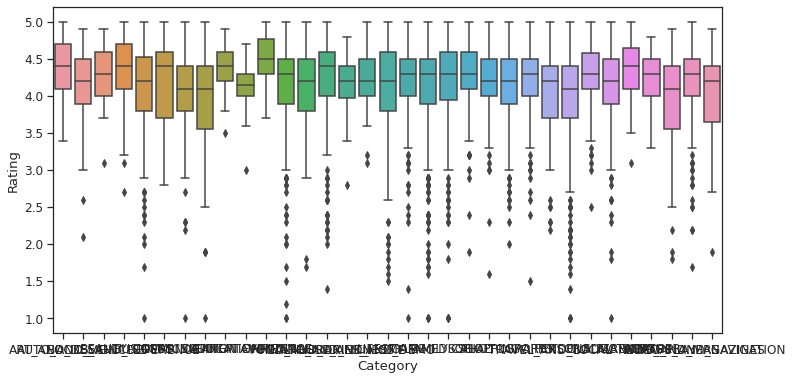

In [0]:
plt.figure(figsize=[12,6])
sns.boxplot("Category", "Rating", data=data7)

In [0]:
#9. Data preprocessing
#For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
#1.	Reviews and Install have some values that are still relatively very high. Before building a linear regression model
#, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [0]:
inp1 = data7.copy()

In [0]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6489 entries, 0 to 10837
Data columns (total 13 columns):
App               6489 non-null object
Category          6489 non-null object
Rating            6489 non-null float64
Reviews           6489 non-null int64
Size              6489 non-null int64
Installs          6489 non-null int64
Type              6489 non-null object
Price             6489 non-null float64
Content Rating    6489 non-null object
Genres            6489 non-null object
Last Updated      6489 non-null object
Current Ver       6489 non-null object
Android Ver       6489 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 709.7+ KB


In [0]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,56000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [0]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])

In [0]:
inp1['Installs'] = np.log1p(inp1['Installs'])

In [0]:
inp1['Size'] = np.log1p(inp1['Size'])

In [0]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,11.373675,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,10.239996,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,10.933125,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [0]:
#2.	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [0]:
cols_to_drop = ['App', 'Last Updated', 'Current Ver', 'Android Ver']

In [0]:
inp1_1 = inp1.drop(cols_to_drop, axis=1).copy()

In [0]:
inp1_1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,11.373675,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,10.239996,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,10.933125,10.819798,Free,0.0,Everyone,Art & Design


In [0]:
#3.	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not 
#understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields 
#to numeric. Name of dataframe should be inp2.

In [0]:
final = inp1_1.copy()

In [0]:
final.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,11.373675,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,10.239996,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,10.933125,10.819798,Free,0.0,Everyone,Art & Design


In [0]:
final['Category'].value_counts()

FAMILY                 1413
other                   838
GAME                    593
TOOLS                   552
MEDICAL                 323
LIFESTYLE               257
FINANCE                 247
PERSONALIZATION         246
BUSINESS                232
SPORTS                  205
HEALTH_AND_FITNESS      203
PRODUCTIVITY            200
DATING                  167
COMMUNICATION           163
PHOTOGRAPHY             160
NEWS_AND_MAGAZINES      147
SOCIAL                  142
TRAVEL_AND_LOCAL        138
BOOKS_AND_REFERENCE     136
SHOPPING                127
Name: Category, dtype: int64

In [0]:
#final['Category'] = final.apply(lambda x: x.mask(x.map(x.value_counts())<100, 'other') if x.name!=['Category'] else x)

In [0]:
cols = ['Category']
for col in cols:
    val = final[col].value_counts()
    y = val[val < 100].index
    final[col] = final[col].replace({x:'other' for x in y})
print (final)

                  Category  Rating  ...  Content Rating                     Genres
0                    other     4.1  ...        Everyone               Art & Design
1                    other     3.9  ...        Everyone  Art & Design;Pretend Play
2                    other     4.7  ...        Everyone               Art & Design
4                    other     4.3  ...        Everyone    Art & Design;Creativity
5                    other     4.4  ...        Everyone               Art & Design
...                    ...     ...  ...             ...                        ...
10832                other     3.8  ...        Everyone                    Weather
10833  BOOKS_AND_REFERENCE     4.8  ...        Everyone          Books & Reference
10834               FAMILY     4.0  ...        Everyone                  Education
10836               FAMILY     4.5  ...        Everyone                  Education
10837               FAMILY     5.0  ...        Everyone                  Education

[64

In [0]:
final['Content Rating'].value_counts()

Everyone        5296
Teen             666
Mature 17+       311
Everyone 10+     213
other              3
Name: Content Rating, dtype: int64

In [0]:
cols = ['Content Rating']
for col in cols:
    val = final[col].value_counts()
    y = val[val < 100].index
    final[col] = final[col].replace({x:'other' for x in y})
print (final)

                  Category  Rating  ...  Content Rating                     Genres
0                    other     4.1  ...        Everyone               Art & Design
1                    other     3.9  ...        Everyone  Art & Design;Pretend Play
2                    other     4.7  ...        Everyone               Art & Design
4                    other     4.3  ...        Everyone    Art & Design;Creativity
5                    other     4.4  ...        Everyone               Art & Design
...                    ...     ...  ...             ...                        ...
10832                other     3.8  ...        Everyone                    Weather
10833  BOOKS_AND_REFERENCE     4.8  ...        Everyone          Books & Reference
10834               FAMILY     4.0  ...        Everyone                  Education
10836               FAMILY     4.5  ...        Everyone                  Education
10837               FAMILY     5.0  ...        Everyone                  Education

[64

In [0]:
final['Genres'].value_counts()

other                1594
Tools                 552
Entertainment         398
Education             398
Medical               323
Lifestyle             257
Finance               247
Personalization       246
Business              232
Sports                207
Health & Fitness      203
Productivity          200
Action                198
Dating                167
Communication         163
Photography           160
Simulation            153
News & Magazines      147
Social                142
Travel & Local        137
Books & Reference     136
Shopping              127
Casual                102
Name: Genres, dtype: int64

In [0]:
cols = ['Genres']
for col in cols:
    val = final[col].value_counts()
    y = val[val < 100].index
    final[col] = final[col].replace({x:'other' for x in y})
print (final)

                  Category  Rating  ...  Content Rating             Genres
0                    other     4.1  ...        Everyone              other
1                    other     3.9  ...        Everyone              other
2                    other     4.7  ...        Everyone              other
4                    other     4.3  ...        Everyone              other
5                    other     4.4  ...        Everyone              other
...                    ...     ...  ...             ...                ...
10832                other     3.8  ...        Everyone              other
10833  BOOKS_AND_REFERENCE     4.8  ...        Everyone  Books & Reference
10834               FAMILY     4.0  ...        Everyone          Education
10836               FAMILY     4.5  ...        Everyone          Education
10837               FAMILY     5.0  ...        Everyone          Education

[6489 rows x 9 columns]


In [0]:
final

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,other,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,other
1,other,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,other
2,other,4.7,11.379520,11.373675,15.424949,Free,0.0,Everyone,other
4,other,4.3,6.875232,10.239996,11.512935,Free,0.0,Everyone,other
5,other,4.4,5.123964,10.933125,10.819798,Free,0.0,Everyone,other
...,...,...,...,...,...,...,...,...,...
10832,other,3.8,7.086738,6.368187,11.512935,Free,0.0,Everyone,other
10833,BOOKS_AND_REFERENCE,4.8,3.806662,6.429719,6.908755,Free,0.0,Everyone,Books & Reference
10834,FAMILY,4.0,2.079442,10.165890,6.216606,Free,0.0,Everyone,Education
10836,FAMILY,4.5,3.663562,10.878066,8.517393,Free,0.0,Everyone,Education


In [0]:
col_to_categorize = ['Category', 'Type', 'Content Rating', 'Genres']

In [0]:
categorical_columns = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres']

In [0]:
X = final.drop(['Rating'], axis=1).values
y = final['Rating'].values

In [0]:
X

array([['other', 5.075173815233827, 9.852246888342531, ..., 0.0,
        'Everyone', 'other'],
       ['other', 6.875232087276577, 9.546884034617925, ..., 0.0,
        'Everyone', 'other'],
       ['other', 11.37951977873004, 11.373674891823535, ..., 0.0,
        'Everyone', 'other'],
       ...,
       ['FAMILY', 2.0794415416798357, 10.165890277802454, ..., 0.0,
        'Everyone', 'Education'],
       ['FAMILY', 3.6635616461296463, 10.87806606028079, ..., 0.0,
        'Everyone', 'Education'],
       ['FAMILY', 1.6094379124341003, 10.491301994830229, ..., 0.0,
        'Everyone', 'Education']], dtype=object)

In [0]:
y

array([4.1, 3.9, 4.7, ..., 4. , 4.5, 5. ])

In [0]:
#from sklearn.preprocessing import OneHotEncoder
#for var in categorical_columns:
 # onehotencoder = OneHotEncoder()
 # final[var]= onehotencoder.fit_transform(final[var]).toarray()

In [0]:
#from sklearn.preprocessing import OneHotEncoder
#X_onehotencoder = OneHotEncoder()
#X = X_onehotencoder.fit_transform(X).toarray()
#print (X)

TypeError: ignored

In [0]:
from sklearn.preprocessing import OneHotEncoder
oneHot = OneHotEncoder()
x_ohe = oneHot.fit_transform(final[col_to_categorize].values.reshape(-1,1)).toarray()
x_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 60)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4542, 3984)
(1947, 3984)
(4542,)
(1947,)


In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs = -1)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [0]:
print(model.intercept_)
print(model.coef_)

-2796185242567.4917
[ 1.03718442e+12 -5.96187286e+12 -1.87803025e+13 ... -7.84468599e+13
  4.23110229e+12 -1.14114484e+13]


In [0]:
list(zip(categorical_columns,model.coef_))

[('Category', 1037184418805.825),
 ('Reviews', -5961872855448.182),
 ('Size', -18780302505216.52),
 ('Installs', 20069974729107.062),
 ('Type', 15002974635477.914),
 ('Price', 41706488004823.36),
 ('Content Rating', 15002974635477.846),
 ('Genres', 37902099201045.65)]

In [0]:
yy_test =model.predict(X_test)
print(yy_test)

[ 3.82080078e+00  3.28564453e+00  4.33642578e+00 ...  1.25819475e+13
  6.31091469e+12 -1.31184213e+13]


In [0]:
print('R2 Value/Coefficient of Determination: {}'.format(model.score(X_test, y_test)))

R2 Value/Coefficient of Determination: -4.076843463370722e+25


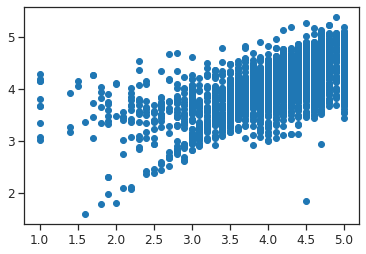

In [0]:
plt.scatter(y_train,model.predict(X_train))

In [0]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(y_train, model.predict(X_train))))

0.4236708626936208


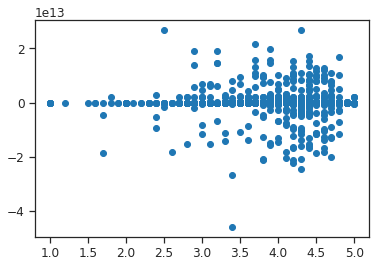

In [0]:
plt.scatter(y_test,model.predict(X_test))

In [0]:
print(sqrt(mean_squared_error(y_test, model.predict(X_test))))

3721235115858.4395


In [0]:
pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)}).head(10)

,Actual,Predicted
0,3.7,3.820801e+00
1,4.6,3.285645e+00
2,4.1,4.336426e+00
3,3.8,-8.919111e+11
4,3.6,1.190632e+11
5,4.6,1.190632e+11
6,3.8,1.190632e+11
7,4.4,1.190632e+11
8,3.7,2.215487e+12
9,4.1,3.834473e+00
